INTEGRATING AND LOADING DATASET

In [ ]:
import pandas as pd

import pandas as pd

# Load your datasets
df1 = pd.read_csv('Autism-Child-Data.csv')
df2 = pd.read_csv('autism_screening.csv')

# Concatenate the datasets along rows
merged_df = pd.concat([df1, df2], axis=0)

# Save or further process the integrated dataset
merged_df.to_csv('integrated_dataset.csv', index=False)


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("integrated_dataset.csv")
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [ ]:
import pandas as pd

description = pd.DataFrame([
    ["index", "The participant’s ID number"],
    ["AX_Score", "Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool AQ-10"],
    ["age", "Age in years"],
    ["gender", "Male or Female"],
    ["ethnicity", "Ethnicities in text form"],
    ["jaundice", "Whether or not the participant was born with jaundice?"],
    ["autism", "Whether or not anyone in tbe immediate family has been diagnosed with autism?"],
    ["country_of_res", "Countries in text format"],
    ["used_app_before", "Whether the participant has used a screening app"],
    ["result", "Score from the AQ-10 screening tool"],
    ["age_desc", "Age as categorical"],
    ["relation", "Relation of person who completed the test"],
    ["Class/ASD", "Participant classification"]
], columns=['Feature', 'Description'])

description.set_index('Feature', inplace=True)

description

,Description
Feature,
index,The participant’s ID number
AX_Score,Score based on the Autism Spectrum Quotient (A...
age,Age in years
gender,Male or Female
ethnicity,Ethnicities in text form
jaundice,Whether or not the participant was born with j...
autism,Whether or not anyone in tbe immediate family ...
country_of_res,Countries in text format
used_app_before,Whether the participant has used a screening app


EDA

In [ ]:
df.shape

(996, 21)

In [ ]:
pd.DataFrame(df.dtypes,
             columns = ["Data Type"])

,Data Type
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,990.000000,996.000000
mean,0.695783,0.476908,0.541165,0.512048,0.570281,0.409639,0.472892,0.604418,0.373494,0.618474,22.907071,5.275100
std,0.460306,0.499717,0.498553,0.500106,0.495285,0.492014,0.499515,0.489221,0.483975,0.486005,17.529736,2.516802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,22.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.750000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
pd.DataFrame(df.isnull().sum(),
             columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
import numpy as np

# Convert blank values to NaN in the 'age' column
df['age'] = df['age'].replace('', np.nan)

# Fill missing values (NaN) in the 'age' column with the rounded mean age
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))


In [ ]:
pd.DataFrame(df.isnull().sum(),
             columns=["Missing Values"]).style.bar(color = "#84A9AC")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3851: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
object_cols = df.select_dtypes('O').columns

object_df = pd.DataFrame({
    'Objects': object_cols,
    'Unique values': [df[col].unique() for col in object_cols],
    'number of unique values':[df[col].nunique()for col in object_cols]
})

object_df

,Objects,Unique values,number of unique values
0,gender,"[m, f]",2
1,ethnicity,"[Others, Middle Eastern , ?, White-European, B...",12
2,jundice,"[no, yes]",2
3,austim,"[no, yes]",2
4,contry_of_res,"[Jordan, United States, Egypt, United Kingdom,...",83
5,used_app_before,"[no, yes]",2
6,age_desc,"[4-11 years, 18 and more]",2
7,relation,"[Parent, ?, Self, Relative, Health care profes...",7
8,Class/ASD,"[NO, YES]",2


In [ ]:
for col in ['ethnicity','contry_of_res','relation']:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

-------------------------------
Column name: ethnicity

Unique values:
['Others' 'Middle Eastern ' '?' 'White-European' 'Black' 'South Asian'
 'Asian' 'Pasifika' 'Hispanic' 'Turkish' 'Latino' 'others']


-------------------------------
Column name: contry_of_res

Unique values:
['Jordan' 'United States' 'Egypt' 'United Kingdom' 'Bahrain' 'Austria'
 'Kuwait' 'United Arab Emirates' 'Europe' 'Malta' 'Bulgaria'
 'South Africa' 'India' 'Afghanistan' 'Georgia' 'New Zealand' 'Syria'
 'Iraq' 'Australia' 'Saudi Arabia' 'Armenia' 'Turkey' 'Pakistan' 'Canada'
 'Oman' 'Brazil' 'South Korea' 'Costa Rica' 'Sweden' 'Philippines'
 'Malaysia' 'Argentina' 'Japan' 'Bangladesh' 'Qatar' 'Ireland' 'Romania'
 'Netherlands' 'Lebanon' 'Germany' 'Latvia' 'Russia' 'Italy' 'China'
 'Nigeria' 'U.S. Outlying Islands' 'Nepal' 'Mexico' 'Isle of Man' 'Libya'
 'Ghana' 'Bhutan' 'Spain' 'Bahamas' 'Burundi' 'Chile' 'France' 'Tonga'
 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran' 'Iceland'
 'Nicaragua' 'Hong Kong'

In [ ]:
df['ethnicity'] = df['ethnicity'].replace(["others"], 'Others')
df['ethnicity'].isin(['?']).sum()

138

In [ ]:
df['relation'] = df['relation'].replace(["self"], 'Self')

In [ ]:
print(df['ethnicity'].unique())


['Others' 'Middle Eastern ' '?' 'White-European' 'Black' 'South Asian'
 'Asian' 'Pasifika' 'Hispanic' 'Turkish' 'Latino']


In [ ]:
import numpy as np
import pandas as pd

# Replace '?' with NaN
# Find the most frequent ethnicity value
most_frequent_ethnicity = df['ethnicity'].mode()[0]

# Replace "?" with the most frequent ethnicity value
df['ethnicity'] = df['ethnicity'].replace('?', most_frequent_ethnicity)



In [ ]:
df['relation'].isin(['?']).sum()

138

In [ ]:

most_frequent_relation = df['relation'].mode()[0]

df['relation'] = df['relation'].replace('?', most_frequent_relation)

print(df['relation'].isnull().sum())

0


In [ ]:
df['relation'].isin(['?']).sum()

0

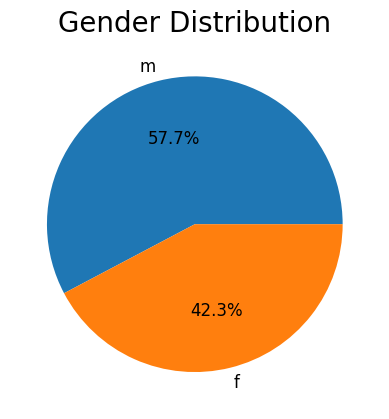

In [ ]:
import matplotlib.pyplot as plt

sex_counts = df['gender'].value_counts()

fig, ax = plt.subplots()

ax.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
ax.set_title('Gender Distribution', fontsize=20)
ax.set_aspect('equal')

plt.show()

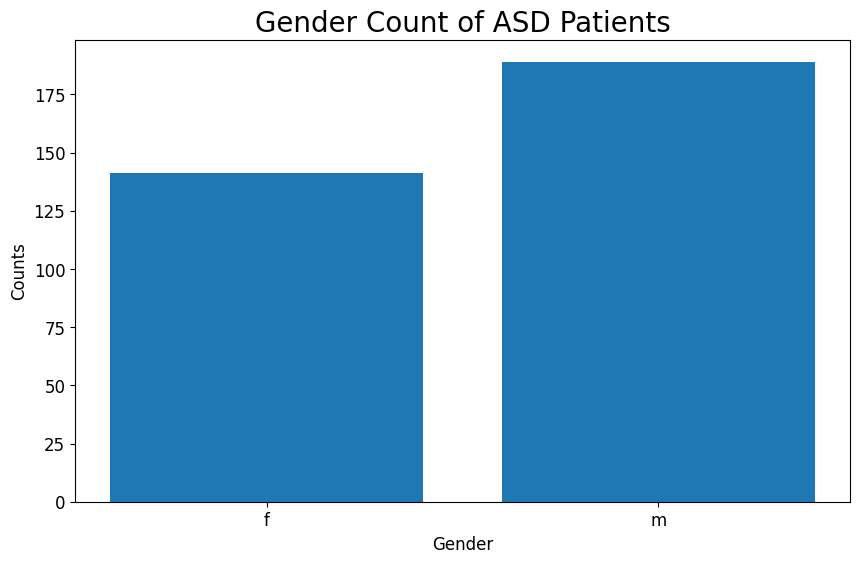

In [ ]:
filtered_data = df[df['Class/ASD'] == "YES"]

sex_counts = filtered_data.groupby('gender').size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
plt.bar(sex_counts['gender'], sex_counts['counts'])
plt.title("Gender Count of ASD Patients", fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Counts")

plt.show()

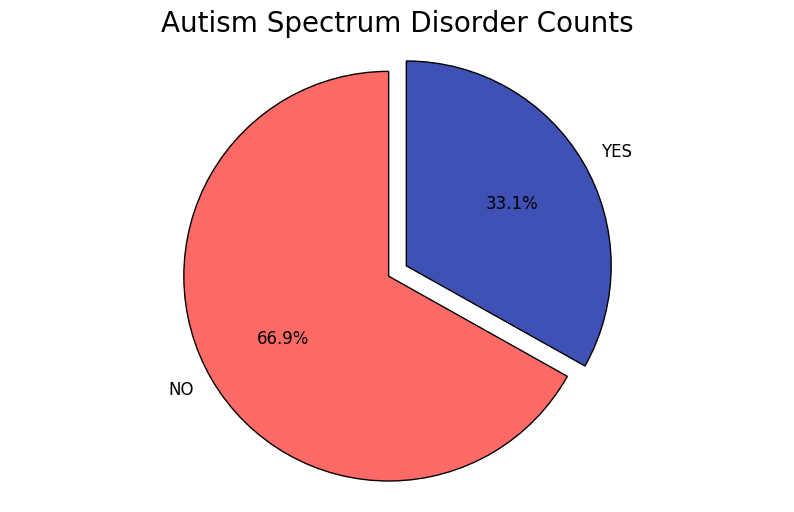

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = df['Class/ASD'].value_counts()

plt.figure(figsize=(10, 6))
labels = class_counts.index
sizes = class_counts.values
colors = ['#FF6A66', '#3F51B5']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Autism Spectrum Disorder Counts', fontsize=20)

plt.axis('equal')

plt.rcParams['font.size'] = 12

plt.show()


In [ ]:
asd_patients_country_wise = pd.DataFrame(df[df['Class/ASD'] == "YES"]['contry_of_res'].value_counts()).rename({"contry_of_res":"ASD_Patient_Counts"}, axis = 1)
asd_patients_country_wise.style.bar(color="#84A9AC")

,count
contry_of_res,
United States,84
United Kingdom,53
Australia,24
India,23
New Zealand,20
Canada,15
Brazil,7
Jordan,7
Egypt,6


In [ ]:
gen_counts = df[df['Class/ASD'] == 'YES'].groupby(['contry_of_res', 'gender']).size().unstack(fill_value=0)
gen_counts.columns.name = None  # Remove the "gender" label from the column index
gen_counts.reset_index(inplace=True)  # Move "Country" from index to column

# Add a new column for total frequency of ASD patients
gen_counts['Total'] = gen_counts['f'] + gen_counts['m']

gen_counts

,contry_of_res,f,m,Total
0,Afghanistan,1,1,2
1,AmericanSamoa,0,1,1
2,Argentina,0,1,1
3,Armenia,2,1,3
4,Australia,12,12,24
5,Austria,3,1,4
6,Bahamas,0,1,1
7,Bahrain,2,0,2
8,Bangladesh,0,3,3
9,Belgium,0,1,1


In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,White-European,no,no,Jordan,yes,5,4-11 years,Self,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,White-European,yes,no,Jordan,no,4,4-11 years,Self,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [ ]:
df.select_dtypes(include='object').columns.tolist()

['gender',
 'ethnicity',
 'jundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'age_desc',
 'relation',
 'Class/ASD']

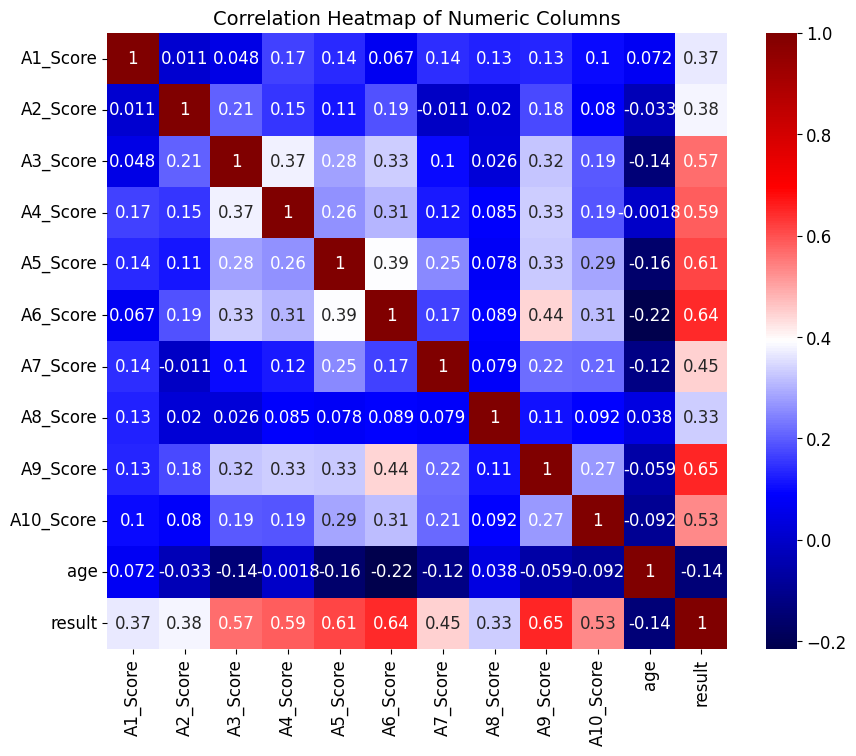

In [ ]:
# Filter only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figsize as needed
sns.heatmap(correlation_matrix, annot=True, cmap="seismic", annot_kws={"fontsize": 12})

plt.title("Correlation Heatmap of Numeric Columns", fontsize=14)
plt.show()

In [ ]:
df_v1=df.copy()
print(df.loc[736:740, 'age'])

736    35.0
737    21.0
738    20.0
739    29.0
740    59.0
Name: age, dtype: float64


In [ ]:
object_cols = [col for col in df_v1.columns if df_v1[col].dtype == "object"]
print({col: (df_v1[col].nunique(), str(df_v1[col].dtype)) for col in object_cols},"\n")

print(object_cols)

{'gender': (2, 'object'), 'ethnicity': (10, 'object'), 'jundice': (2, 'object'), 'austim': (2, 'object'), 'contry_of_res': (83, 'object'), 'used_app_before': (2, 'object'), 'age_desc': (2, 'object'), 'relation': (5, 'object'), 'Class/ASD': (2, 'object')} 

['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']


In [ ]:
freq = df_v1['contry_of_res'].value_counts(normalize=True)

df_v1['contry-freq'] = df_v1['contry_of_res'].map(freq)
df_v1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,contry-freq
0,1,1,0,0,1,1,0,1,0,0,...,Others,no,no,Jordan,no,5,4-11 years,Parent,NO,0.067269
1,1,1,0,0,1,1,0,1,0,0,...,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO,0.067269
2,1,1,0,0,0,1,1,1,0,0,...,White-European,no,no,Jordan,yes,5,4-11 years,Self,NO,0.067269
3,0,1,0,0,1,1,0,0,0,1,...,White-European,yes,no,Jordan,no,4,4-11 years,Self,NO,0.067269
4,1,1,1,1,1,1,1,1,1,1,...,Others,yes,no,United States,no,10,4-11 years,Parent,YES,0.155622


In [ ]:
df_v2=df_v1.drop("contry_of_res", axis=1)

In [ ]:
object_cols.remove("contry_of_res")
print(object_cols)

['gender', 'ethnicity', 'jundice', 'austim', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']


In [ ]:
df_v3=df_v2.replace({'jundice': "yes"}, 1).replace({'jundice' : "no"}, 0).replace({'austim': "yes"}, 1).replace({'austim' : "no"}, 0).replace({'used_app_before': "yes"}, 1).replace({'used_app_before' : "no"}, 0)

In [ ]:
df_v3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,used_app_before,result,age_desc,relation,Class/ASD,contry-freq
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,0,0,0,5,4-11 years,Parent,NO,0.067269
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,0,0,0,5,4-11 years,Parent,NO,0.067269
2,1,1,0,0,0,1,1,1,0,0,...,m,White-European,0,0,1,5,4-11 years,Self,NO,0.067269
3,0,1,0,0,1,1,0,0,0,1,...,f,White-European,1,0,0,4,4-11 years,Self,NO,0.067269
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,1,0,0,10,4-11 years,Parent,YES,0.155622


In [ ]:
object_cols.remove('jundice')
object_cols.remove('used_app_before')
object_cols.remove('austim')
print(object_cols)

['gender', 'ethnicity', 'age_desc', 'relation', 'Class/ASD']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

encoded_data = encoder.fit_transform(df_v3[["gender",'Class/ASD']])

encoded_df = pd.DataFrame(encoded_data, columns=["gender_encoded",'Class/ASD_en'])
encoded_df.head()

,gender_encoded,Class/ASD_en
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,0.0
4,1.0,1.0


In [ ]:
df_v3['relation'].value_counts()

relation
Self                        665
Parent                      264
Relative                     45
Health care professional     17
Others                        5
Name: count, dtype: int64

In [ ]:
object_cols.remove('gender')
object_cols.remove('Class/ASD')

In [ ]:
print(object_cols)

['ethnicity', 'age_desc', 'relation']


In [ ]:
df_v1["age_desc"].nunique()

2

In [ ]:
df_v4=df_v3.drop('age_desc',axis=1)
df_v4.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD,contry-freq
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,0,0,0,5,Parent,NO,0.067269
1,1,1,0,0,1,1,0,1,0,0,6.0,m,Middle Eastern,0,0,0,5,Parent,NO,0.067269
2,1,1,0,0,0,1,1,1,0,0,6.0,m,White-European,0,0,1,5,Self,NO,0.067269
3,0,1,0,0,1,1,0,0,0,1,5.0,f,White-European,1,0,0,4,Self,NO,0.067269
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,1,0,0,10,Parent,YES,0.155622


In [ ]:
object_cols.remove('age_desc')

In [ ]:
object_cols

['ethnicity', 'relation']

ONE-HOT ENCODING

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

X_encoded = []
for col in object_cols:
    col_data = df_v4[col].values.reshape(-1, 1)
    col_encoded = encoder.fit_transform(col_data)
    X_encoded.append(col_encoded)

X_encoded = np.concatenate(X_encoded, axis=1)
X_encoded_df = pd.DataFrame(X_encoded)

num_df = df.select_dtypes(include=['int', 'float'])

df_v2= pd.concat([num_df,encoded_df, X_encoded_df], axis=1)
df_v2.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,5,6,7,8,9,10,11,12,13,14
0,1,1,0,0,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0,0,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,1,0,0,1,1,0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,1,1,1,1,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


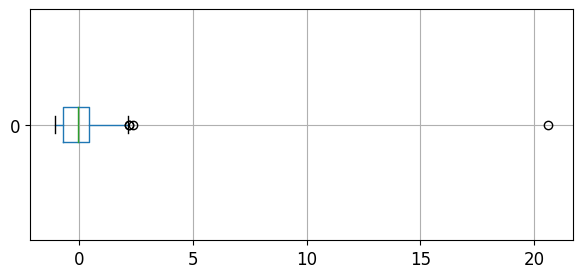

In [ ]:
from sklearn.preprocessing import StandardScaler

features = df_v2['age']
target = df_v2["Class/ASD_en"]

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features.values.reshape(-1, 1)))
data_boxplot = features_scaled.boxplot(return_type='dict', vert=False, figsize=(7,3))

In [ ]:
Q1 = np.percentile(features_scaled, 25)
Q3 = np.percentile(features_scaled, 75)

upper_whisker = Q3 + 1.5 * (Q3-Q1)
upper_whisker

2.123443343514486

In [ ]:
outliers = features_scaled[(features_scaled >2.123).all(axis=1)]
outliers

,0
299,2.352433
344,20.614368
495,2.123443
723,2.180691
787,2.180691


In [ ]:
df.iloc[[7,52,203,344,495],10:22]

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
7,5.0,f,Middle Eastern,no,no,Bahrain,no,8,4-11 years,Parent,YES
52,6.0,m,White-European,no,no,Jordan,no,6,4-11 years,Self,NO
203,7.0,f,Asian,yes,no,India,no,7,4-11 years,Parent,YES
344,383.0,f,Pasifika,no,no,New Zealand,no,1,18 and more,Self,NO
495,60.0,f,White-European,no,yes,United States,no,9,18 and more,Relative,YES


In [ ]:
average_age = df_v2['age'].mean()
df_v2.iloc[344, 10] = average_age
df_v2.iloc[344, 10]

22.907630522088354

In [ ]:
df_v2.iloc[[7,52,203,344,495],10:22]

,age,result,gender_encoded,Class/ASD_en,0,1,2,3,4,5,6,7
7,5.000000,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52,6.000000,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,7.000000,7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,22.907631,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
495,60.000000,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
column_13 = df_v2.pop(df_v2.columns[13])

df_v2['target'] = column_13

df_v2.to_csv('modified_file.csv', index=False)
df_v2.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,6,7,8,9,10,11,12,13,14,target
0,1,1,0,0,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,0,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1,0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,0,0,1,1,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0,0,1,0,1,1,0,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,0,1,1,1,1,0,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,1,1,1,1,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,1,1,1,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0,0,1,1,1,0,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_v2.columns

Index([      'A1_Score',       'A2_Score',       'A3_Score',       'A4_Score',
             'A5_Score',       'A6_Score',       'A7_Score',       'A8_Score',
             'A9_Score',      'A10_Score',            'age',         'result',
       'gender_encoded',                0,                1,                2,
                      3,                4,                5,                6,
                      7,                8,                9,               10,
                     11,               12,               13,               14,
               'target'],
      dtype='object')

skewness

In [ ]:
import pandas as pd

# Example DataFrame (replace this with your dataset)


# Compute skewness for each column
skewness = df_v2.skew()

# Check if skewness is positive or negative
for column, skew in skewness.items():
    if skew > 0:
        print(f"{column}: Right-skewed (Positive skewness)")
    elif skew < 0:
        print(f"{column}: Left-skewed (Negative skewness)")
    else:
        print(f"{column}: Symmetric distribution")


A1_Score: Left-skewed (Negative skewness)
A2_Score: Right-skewed (Positive skewness)
A3_Score: Left-skewed (Negative skewness)
A4_Score: Left-skewed (Negative skewness)
A5_Score: Left-skewed (Negative skewness)
A6_Score: Right-skewed (Positive skewness)
A7_Score: Right-skewed (Positive skewness)
A8_Score: Left-skewed (Negative skewness)
A9_Score: Right-skewed (Positive skewness)
A10_Score: Left-skewed (Negative skewness)
age: Right-skewed (Positive skewness)
result: Right-skewed (Positive skewness)
gender_encoded: Left-skewed (Negative skewness)
0: Right-skewed (Positive skewness)
1: Right-skewed (Positive skewness)
2: Right-skewed (Positive skewness)
3: Right-skewed (Positive skewness)
4: Right-skewed (Positive skewness)
5: Right-skewed (Positive skewness)
6: Right-skewed (Positive skewness)
7: Right-skewed (Positive skewness)
8: Right-skewed (Positive skewness)
9: Right-skewed (Positive skewness)
10: Right-skewed (Positive skewness)
11: Right-skewed (Positive skewness)
12: Right-skew

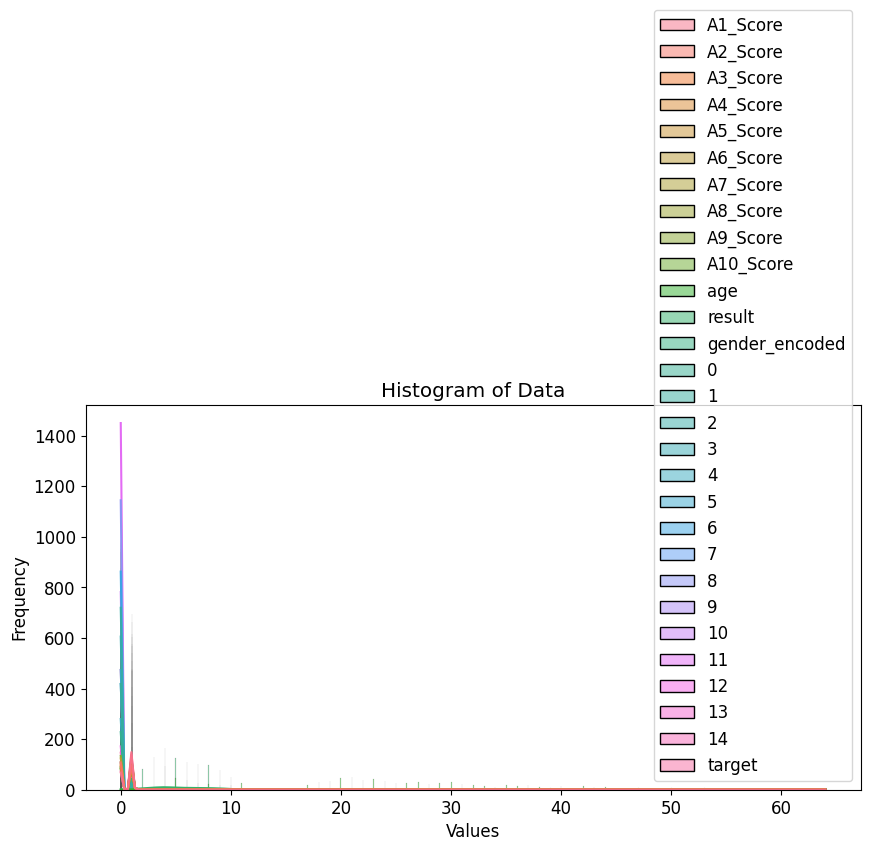

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_v2, kde=True)
plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df_v2.drop(columns=['result']+[df_v2.columns[-1]],axis=1)
y = df_v2.iloc[:, -1]

X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

from sklearn.tree import export_graphviz
import graphviz
from io import StringIO
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graphviz.Source(export_graphviz(clf, filled=True, rounded=True, special_characters=True, feature_names=X.columns))

graph.write_png("decision_tree.png")

Accuracy: 0.88
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       139
         1.0       0.76      0.87      0.81        61

    accuracy                           0.88       200
   macro avg       0.85      0.87      0.86       200
weighted avg       0.88      0.88      0.88       200



True

In [ ]:
!pip install catboost

In [ ]:
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, PowerTransformer, Normalizer

import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

from sklearn import metrics

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
df_v2.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,6,7,8,9,10,11,12,13,14,target
0,1,1,0,0,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,0,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1,0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,0,0,1,1,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


**FEATURE SCALING**

In [ ]:
Best_scaling_techniques=[
    StandardScaler(),
    MaxAbsScaler(),
    MinMaxScaler(),
    PowerTransformer(),
    RobustScaler(),
    QuantileTransformer()
]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
import catboost
from sklearn.ensemble import ExtraTreesClassifier

Best_scaling_techniques = [StandardScaler(), MinMaxScaler(), MinMaxScaler(),
    PowerTransformer(),
    RobustScaler(),
    QuantileTransformer()]

results_df = pd.DataFrame(columns=[scaler.__class__.__name__ for scaler in Best_scaling_techniques])

names = ['LinearDiscriminantAnalysis', 'NearestCentroid', 'RidgeClassifier', 'DecisionTreeClassifier',
         'AdaBoostClassifier', 'CatBoostClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
         'SupportVectorMachine', 'SGDClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LogisticRegression']
models = [
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    RidgeClassifier(),
    DecisionTreeClassifier(max_depth=50, min_samples_leaf=60),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=50, min_samples_leaf=60), n_estimators=250),
    CatBoostClassifier(),
    RandomForestClassifier(n_estimators=250, max_depth=10, min_samples_leaf=25),
    ExtraTreesClassifier(n_estimators=100,random_state=42),
    SVC(C=1.0, kernel='rbf', degree=3, gamma='scale'),
    SGDClassifier(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression()
]

for scaler in Best_scaling_techniques:
  for counter, model in enumerate(models):

      X_scaled = scaler.fit_transform(X)

      X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)

      y_train_flat = np.ravel(y_train)
      y_test_flat = np.ravel(y_test)

      model.fit(X_train, y_train_flat)

      y_pred = model.predict(X_test)

      results_df.loc[names[counter], type(scaler).__name__] = accuracy_score(y_test_flat, y_pred)
      results_df_sorted = results_df.sort_values(by=results_df.columns[0], ascending=False)

results_df_sorted.head(13)


Streaming output truncated to the last 5000 lines.
4:	learn: 0.6359082	total: 7.45ms	remaining: 1.48s
5:	learn: 0.6253687	total: 8.98ms	remaining: 1.49s
6:	learn: 0.6140952	total: 10.5ms	remaining: 1.49s
7:	learn: 0.6049690	total: 11.9ms	remaining: 1.47s
8:	learn: 0.5962813	total: 13.2ms	remaining: 1.45s
9:	learn: 0.5878070	total: 14.6ms	remaining: 1.45s
10:	learn: 0.5801257	total: 15.6ms	remaining: 1.41s
11:	learn: 0.5741137	total: 16.6ms	remaining: 1.36s
12:	learn: 0.5651066	total: 17.8ms	remaining: 1.35s
13:	learn: 0.5573614	total: 19.4ms	remaining: 1.36s
14:	learn: 0.5501437	total: 20.6ms	remaining: 1.35s
15:	learn: 0.5425287	total: 21.9ms	remaining: 1.35s
16:	learn: 0.5334477	total: 23.4ms	remaining: 1.35s
17:	learn: 0.5256813	total: 24.9ms	remaining: 1.36s
18:	learn: 0.5182352	total: 26.4ms	remaining: 1.36s
19:	learn: 0.5116416	total: 27.7ms	remaining: 1.36s
20:	learn: 0.5074704	total: 28.6ms	remaining: 1.33s
21:	learn: 0.5005523	total: 30ms	remaining: 1.33s
22:	learn: 0.4939158	

,StandardScaler,MinMaxScaler,MinMaxScaler,PowerTransformer,RobustScaler,QuantileTransformer
LogisticRegression,1.0,1.0,1.0,1.0,1.0,1.0
SGDClassifier,0.993311,1.0,1.0,0.986622,1.0,1.0
CatBoostClassifier,0.973244,0.973244,0.973244,0.973244,0.973244,0.973244
AdaBoostClassifier,0.966555,0.966555,0.966555,0.966555,0.966555,0.966555
SupportVectorMachine,0.963211,0.976589,0.976589,0.963211,0.976589,0.976589
ExtraTreesClassifier,0.949833,0.949833,0.949833,0.953177,0.949833,0.943144
LinearDiscriminantAnalysis,0.946488,0.946488,0.946488,0.943144,0.946488,0.943144
RidgeClassifier,0.943144,0.943144,0.943144,0.943144,0.943144,0.943144
RandomForestClassifier,0.943144,0.953177,0.953177,0.949833,0.959866,0.943144
KNeighborsClassifier,0.916388,0.926421,0.926421,0.919732,0.943144,0.916388


In [ ]:
# Calculate the average accuracy score for each scaling technique
average_accuracy = results_df_sorted.mean(axis=0)

# Find the scaling technique with the highest average accuracy score
best_scaling_technique = average_accuracy.sort_values(ascending=False)
best_accuracy = average_accuracy.max()

print(f"The best performing scaling technique is '{best_scaling_technique}' with an average accuracy score of {best_accuracy:.4f}")


The best performing scaling technique is 'RobustScaler           0.948289
MinMaxScaler           0.946488
MinMaxScaler           0.946488
QuantileTransformer    0.944173
PowerTransformer       0.942372
StandardScaler         0.942115
dtype: object' with an average accuracy score of 0.9483



**SAMPLING AND FEATURE SELECTION**

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline

In [ ]:
X = df_v2.iloc[:, :-1]
y = df_v2.iloc[:, -1:]
X.columns = X.columns.astype(str)

new


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer

X = df_v2.drop(columns=['result']+[df_v2.columns[-1]],axis=1)
y = df_v2.iloc[:, -1:]
X.columns = X.columns.astype(str)

resampling_pipeline = make_pipeline(ADASYN(), TomekLinks())
X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

num_rows_resampled = y_resampled.shape[0]


print("Number of rows after resampling:", num_rows_resampled)

print("------------------")

class_counts = y_resampled['target'].value_counts()

print("Number of '1':", class_counts[1])
print("Number of '0':", class_counts[0])




X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_features_to_select = 20
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

classifiers = [
    ('DecisionTree', DecisionTreeClassifier(max_depth=None)),
    ('ExtraTrees', ExtraTreesClassifier(n_estimators=100)),
    ('SVM', SVC(kernel='rbf', gamma='scale')),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('NaiveBayes', GaussianNB()),
    ('SGD', SGDClassifier()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('NearestCentroid', NearestCentroid()),

    ('CatBoost', CatBoostClassifier(iterations=100, verbose=False)),
    ('LogisticRegression', LogisticRegression(max_iter=1000))
]

results = {'Classifier': [],  'Test Accuracy': [], 'Precision': [], 'Recall': [], 'Sensitivity': []}

for name, classifier in classifiers:

    classifier.fit(X_train_selected, y_train)

    y_test_pred = classifier.predict(X_test_selected)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    sensitivity = tp / (tp + fn)

    results['Classifier'].append(name)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['Sensitivity'].append(sensitivity)

metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.sort_values(by='Test Accuracy', ascending=False)



print(metrics_df)

Number of rows after resampling: 1298
------------------
Number of '1': 635
Number of '0': 663


<ipython-input-151-2430cd7ad4e1>:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_selected, y_train)


           Classifier  Test Accuracy  Precision    Recall  Sensitivity
8            CatBoost       0.974359   0.968912  0.979058     0.979058
2                 SVM       0.958974   0.944162  0.973822     0.973822
1          ExtraTrees       0.956410   0.957895  0.952880     0.952880
5                 SGD       0.930769   0.905941  0.958115     0.958115
6                 LDA       0.928205   0.886256  0.979058     0.979058
7     NearestCentroid       0.923077   0.888889  0.963351     0.963351
3                 KNN       0.920513   0.866972  0.989529     0.989529
9  LogisticRegression       0.920513   0.884615  0.963351     0.963351
0        DecisionTree       0.915385   0.911458  0.916230     0.916230
4          NaiveBayes       0.900000   0.913043  0.879581     0.879581


In [ ]:
from sklearn.metrics import classification_report

for name, classifier in classifiers:
    classifier.fit(X_train_selected, y_train)

    y_test_pred = classifier.predict(X_test_selected)

    report = classification_report(y_test, y_test_pred)

    print(f"Classification Report for {name}:")
    print(report)


Classification Report for DecisionTree:
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       199
         1.0       0.90      0.88      0.89       191

    accuracy                           0.90       390
   macro avg       0.90      0.90      0.90       390
weighted avg       0.90      0.90      0.90       390



<ipython-input-152-aac8140b9f39>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_selected, y_train)


Classification Report for ExtraTrees:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       199
         1.0       0.97      0.95      0.96       191

    accuracy                           0.96       390
   macro avg       0.96      0.96      0.96       390
weighted avg       0.96      0.96      0.96       390

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       199
         1.0       0.94      0.97      0.96       191

    accuracy                           0.96       390
   macro avg       0.96      0.96      0.96       390
weighted avg       0.96      0.96      0.96       390

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       199
         1.0       0.87      0.99      0.92       191

    accuracy                           0.92       390
   macro avg       0.93     

In [ ]:
for name, classifier in classifiers:
    classifier.fit(X_train_selected, y_train)

    y_test_pred = classifier.predict(X_test_selected)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    sensitivity = tp / (tp + fn)

    results['Classifier'].append(name)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['Sensitivity'].append(sensitivity)

    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\n")


Confusion Matrix for DecisionTree:
[[188  11]
 [ 17 174]]




<ipython-input-153-5886300c7137>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_selected, y_train)


Confusion Matrix for ExtraTrees:
[[193   6]
 [  8 183]]


Confusion Matrix for SVM:
[[188  11]
 [  5 186]]


Confusion Matrix for KNN:
[[170  29]
 [  2 189]]


Confusion Matrix for NaiveBayes:
[[183  16]
 [ 23 168]]


Confusion Matrix for SGD:
[[185  14]
 [ 15 176]]


Confusion Matrix for LDA:
[[175  24]
 [  4 187]]


Confusion Matrix for NearestCentroid:
[[176  23]
 [  7 184]]


Confusion Matrix for CatBoost:
[[193   6]
 [  4 187]]


Confusion Matrix for LogisticRegression:
[[175  24]
 [  7 184]]




IMPLEMENTING CLASSIFICATION ALGORITHMS:


1.NaiveBayes
2.DecisionTree
3.AdaBppst
4.RandomForest
5.SupportVectorMachine
6.LinearDiscriminantAnalysis
7.LogisticRegression
8.K-NearestNeighbour
-----ADDITIONALLY-----
9.RidgeClassifier
10.CatBoost
11.NearestCentroid
12.SGD Classifier
13.ExtraTreeClassifier






In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

X = df_v2.iloc[:, :-1]
y = df_v2.iloc[:, -1:]
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

resampling_pipeline = make_pipeline(ADASYN(), TomekLinks())

X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)


n_estimators = 50
names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
         'SupportVectorMachine', 'AdaBoostClassifier', 'KNearestNeighbor', 'NaiveBayes', 'SGDClassifier',
         'LinearDiscriminantAnalysis', 'NearestCentroid', 'RidgeClassifier', 'CatBoost','LogisticRegression']
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    SVC(C=1.0, kernel='rbf', gamma='scale'),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=None),
        n_estimators=n_estimators
    ),
    KNeighborsClassifier(n_neighbors=3),
    GaussianNB(),
    SGDClassifier(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    RidgeClassifier(),
    CatBoostClassifier(),
    LogisticRegression()
]

results = {'Model': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [], 'Mean Score': []}
for counter, model in enumerate(models):

    model.fit(X_train_resampled, y_train_resampled.values.ravel())

    y_pred = model.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test.values.ravel(), y_pred).ravel()

    accuracy = accuracy_score(y_test.values.ravel(), y_pred)

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    results['Model'].append(names[counter])
    results['Accuracy'].append(accuracy)
    results['Sensitivity'].append(sensitivity)
    results['Specificity'].append(specificity)
    results['Mean Score'].append((accuracy + sensitivity + specificity) / 3)

scores = pd.DataFrame(results)

sorted_df = scores.sort_values(by='Mean Score', ascending=False)
sorted_df





Learning rate set to 0.009919
0:	learn: 0.6687468	total: 12.2ms	remaining: 12.2s
1:	learn: 0.6428009	total: 23.4ms	remaining: 11.7s
2:	learn: 0.6194276	total: 33.7ms	remaining: 11.2s
3:	learn: 0.5952012	total: 41.7ms	remaining: 10.4s
4:	learn: 0.5733580	total: 50.4ms	remaining: 10s
5:	learn: 0.5525766	total: 63.9ms	remaining: 10.6s
6:	learn: 0.5338420	total: 72.1ms	remaining: 10.2s
7:	learn: 0.5158344	total: 86.2ms	remaining: 10.7s
8:	learn: 0.4940675	total: 89.4ms	remaining: 9.85s
9:	learn: 0.4733125	total: 97.2ms	remaining: 9.63s
10:	learn: 0.4545391	total: 105ms	remaining: 9.45s
11:	learn: 0.4380310	total: 117ms	remaining: 9.63s
12:	learn: 0.4209822	total: 124ms	remaining: 9.41s
13:	learn: 0.4068245	total: 130ms	remaining: 9.17s
14:	learn: 0.3909537	total: 137ms	remaining: 8.99s
15:	learn: 0.3780899	total: 140ms	remaining: 8.61s
16:	learn: 0.3632431	total: 145ms	remaining: 8.39s
17:	learn: 0.3504011	total: 149ms	remaining: 8.13s
18:	learn: 0.3390743	total: 154ms	remaining: 7.97s
19:

,Model,Accuracy,Sensitivity,Specificity,Mean Score
0,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
4,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
7,SGDClassifier,1.000000,1.000000,1.000000,1.000000
11,CatBoost,1.000000,1.000000,1.000000,1.000000
12,LogisticRegression,1.000000,1.000000,1.000000,1.000000
2,ExtraTreesClassifier,0.989967,0.988764,0.990476,0.989736
8,LinearDiscriminantAnalysis,0.959866,1.000000,0.942857,0.967574
10,RidgeClassifier,0.959866,1.000000,0.942857,0.967574
5,KNearestNeighbor,0.943144,1.000000,0.919048,0.954064


In [ ]:
import pandas as pd

data = pd.read_csv("modified_file.csv")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(data)

nan_count = pd.DataFrame(X_train_scaled).isna().sum().sum()

print(f"Number of NaN values in X_train_scaled: {nan_count}")

Number of NaN values in X_train_scaled: 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_resampled, y_train_resampled)

nearest_centroid_classifier = NearestCentroid()
nearest_centroid_classifier.fit(X_train_resampled, y_train_resampled)

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train_resampled, y_train_resampled)

catboost_classifier = CatBoostClassifier(iterations=100, random_state=42, silent=True)
catboost_classifier.fit(X_train_resampled, y_train_resampled)




classifiers = {
    'LinearDiscriminantAnalysis': lda_classifier,
    'NearestCentroid': nearest_centroid_classifier,
    'RidgeClassifier': ridge_classifier,
    'CatBoostClassifier': catboost_classifier,


}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_scaled)
    print(f"Classifier: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Classifier: LinearDiscriminantAnalysis
Confusion Matrix:
[[199  11]
 [  1  88]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       210
         1.0       0.89      0.99      0.94        89

    accuracy                           0.96       299
   macro avg       0.94      0.97      0.95       299
weighted avg       0.96      0.96      0.96       299

Classifier: NearestCentroid
Confusion Matrix:
[[196  14]
 [  2  87]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       210
         1.0       0.86      0.98      0.92        89

    accuracy                           0.95       299
   macro avg       0.93      0.96      0.94       299
weighted avg       0.95      0.95      0.95       299

Classifier: RidgeClassifier
Confusion Matrix:
[[199  11]
 [  1  88]]

Classification Report:
              precision    recall  f1-score   support

 